In [ ]:
import joblib

In [ ]:
f='/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib.bz2'
file = joblib.load(f) 

In [ ]:
X_train = file['trainX']
Y_train = file["trainY"]

X_train.shape

(78646, 2000)

In [ ]:
f='/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib.bz2'
file = joblib.load(f) 

In [ ]:
X_test = file['testX']
Y_test = file['testY']
max_fatures = file["max_fatures"]
bias = file["bias"]
max_fatures

8000

In [ ]:
del file
del f

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
# model
embed_dim = 128
lstm_out = 100

model=Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1024000   
_________________________________________________________________
dropout (Dropout)            (None, 2000, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               183200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 3

In [ ]:
batch_size = 128
# also adding weights
class_weights = {1: 0.54 ,
                0: 7.60 }
checkpoint_path = "/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_models/model.hdf5"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',verbose=1, save_best_only=False, save_weights_only=False,mode='max')
history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data=(X_test, Y_test),class_weight=class_weights,callbacks=[cp_callback])

Epoch 1/10
615/615 [==============================] - 224s 350ms/step - loss: 1.2694 - accuracy: 0.5002 - val_loss: 2.5479 - val_accuracy: 0.0658

Epoch 00001: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_models/model.hdf5
Epoch 2/10
615/615 [==============================] - 218s 355ms/step - loss: 0.9511 - accuracy: 0.5086 - val_loss: 1.5010 - val_accuracy: 0.5494

Epoch 00002: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_models/model.hdf5
Epoch 3/10
615/615 [==============================] - 217s 354ms/step - loss: 0.5092 - accuracy: 0.8103 - val_loss: 0.9282 - val_accuracy: 0.7403

Epoch 00003: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_models/model.hdf5
Epoch 4/10
615/615 [==============================] - 218s 354ms/step - loss: 0.3166 - accuracy: 0.8956 - val_loss: 0.8642 - val_accuracy: 0.7750

Epoch 00004: sav

In [ ]:
import matplotlib.pyplot as plt

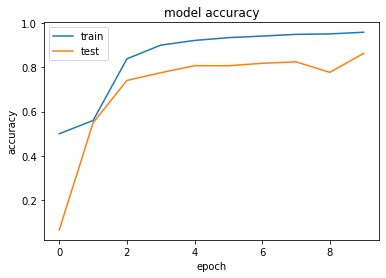

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

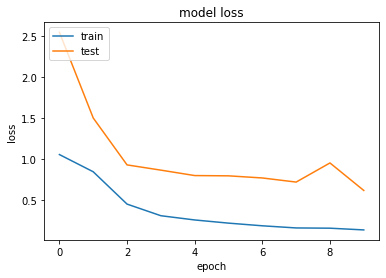

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()